In [1]:
"""
Problem 1.1

Using N=20, sigma_squared_noise = 0.1 and the structure of the correct model 
(5th degree polynomial with the coefficient of the 4th power equal to zero), 
apply the Least Squares method to estimate the parameter vector. 
Calculate the Mean Square Error of y over the training set and over a test set 
comprising of 1000 points randomly selected in the interval [0,2].

The true components of the training vector: [0.2, -1, 0.9, 0.7, 0, -0.2]
The noise is white Gaussia, mean=0

"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from functions_problems_1a import *

In [2]:
"""
Predetermined parameters of the problem
"""
#True thetas
thetas = np.array([0.2, -1, 0.9, 0.7, 0, -0.2])

#Degree of the polynomial model
degrees_pol = 5

#Interval
lower_bound = 0
upper_bound = 2

#Total number of values from the interval
N = 20

The estimated parameter vector: [  0.19252522  -6.09767107  18.93481593 -21.86911552  11.76111159
  -2.37964916]
The Mean Square Error of y over the Train set:  0.06735


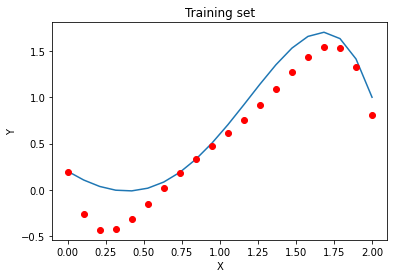

<Figure size 432x288 with 0 Axes>

In [3]:
"""
For the Training set
"""
#Create the training set, produce 20 equidistant points in [0,2]
X = np.linspace(lower_bound, upper_bound, N)

#Create the polynomial matrix for X and add a column of ones
X_pol = X
for i in range(2,degrees_pol+1):
    X_pol = np.c_[X_pol, X**(i)]    #add the 5 polynomial degrees of each xi 
Phi = np.c_[np.ones((N,1)), X_pol]  #add x0 = 1 to each instance


noise_train = noise(0, 0.1**0.5, N)

y_train = y_vector(thetas, Phi)
y = np.add(y_train,noise_train) # add noise on each yi

# Least Squares: Calculate the best thetas using the training set (Phi and y)
theta_LS = least_squares(Phi, y)

#Calculated the best values of y from the best thetas and the Phi array
y_train_newthetas = y_vector(theta_LS, Phi)

#Calculate the Mean Square Error of y over the training set
MSE_training = mse(y, y_train_newthetas)
print("The estimated parameter vector:", theta_LS)
print("The Mean Square Error of y over the Train set: ", round(MSE_training, 5))

#Blue line is the true model, the red dots are the predicted points
plt.title("Training set")
plt.plot(X,y_train,'-',X,y_train_newthetas,'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.savefig("1_1_a.png")

The Mean Square Error of y over the Test set:  0.14543


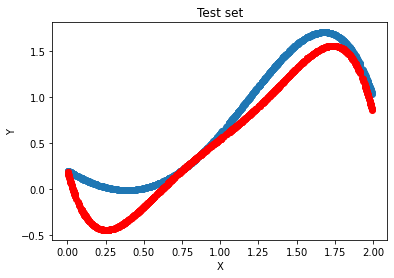

<Figure size 432x288 with 0 Axes>

In [4]:
"""
For the Test set
"""
#Test set comprising of 1000 points randomly selected in the interval [0,2].
N_test = 1000
x_test = np.random.uniform(lower_bound, upper_bound, N_test)

#Create the polynomial matrix for Phi_test and add a column of ones
X_test_pol = x_test
for i in range(2,degrees_pol+1):
    X_test_pol = np.c_[X_test_pol, x_test**(i)]    #add the 5 polynomial degrees of each xi 
Phi_test = np.c_[np.ones((N_test,1)), X_test_pol]  #add x0 = 1 to each instance

#Calculated the values of y from the true thetas and the Phi_test array
y_test = y_vector(thetas, Phi_test)

noise_vector_test = noise(0, 0.1**0.5, N_test)
y_test_noise = np.add(y_test, noise_vector_test)

#Calculated the values of y from the new thetas and the Phi_test array
y_LS_test = y_vector(theta_LS, Phi_test)


#Calculate the Mean Square Error of y over the test set
MSE_test_set = mse(y_test_noise, y_LS_test)
print("The Mean Square Error of y over the Test set: ", round(MSE_test_set, 5))

#Blue dots are the true model, the red dots are the predicted points
plt.title("Test set")
plt.plot(x_test,y_test,'o',x_test,y_LS_test,'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.savefig("1_1_b.png")